In [12]:
import pandas as pd
import json
import os
import numpy as np
import scipy
import math

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

import csv

     g          x
0    A  64.038123
1    B  66.147050
2    C  66.370011
3    D  68.791019
4    E  70.583534
5    F  69.135114
6    G  72.390092
7    H  73.822191
8    I  73.868785
9    J  72.938377
10   A  65.723433
11   B  66.580572
12   C  68.631715
13   D  68.175267
14   E  68.772384
15   F  70.369829
16   G  72.296533
17   H  70.704948
18   I  73.755082
19   J  75.130836
20   A  67.067787
21   B  64.544249
22   C  66.549600
23   D  68.577936
24   E  70.324557
25   F  69.317165
26   G  71.623854
27   H  72.661729
28   I  73.140564
29   J  73.978304
..  ..        ...
470  A  64.413991
471  B  67.116115
472  C  66.234674
473  D  67.035529
474  E  69.154908
475  F  69.085536
476  G  71.498106
477  H  71.599936
478  I  72.539776
479  J  73.719101
480  A  63.521875
481  B  65.650484
482  C  65.996162
483  D  67.250952
484  E  69.450876
485  F  70.155390
486  G  70.778408
487  H  70.343478
488  I  73.454085
489  J  73.603612
490  A  64.724145
491  B  67.263671
492  C  69.148477
493  D  66

/Users/John/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning:

tight_layout cannot make axes height small enough to accommodate all axes decorations

/Users/John/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning:

tight_layout cannot make axes height small enough to accommodate all axes decorations

/Users/John/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning:

tight_layout cannot make axes height small enough to accommodate all axes decorations



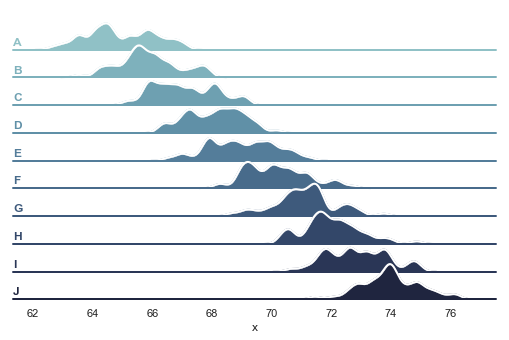

In [58]:
#Test of ridgeline plot - comments will specifiy what each step is doing

#Style = white background (one of 5 styles)
#rc - customization of style (can change many featyres - here are changing the color of the gridlines of the axis)
#Source - https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data

#Random state - random number generator (seems pretty powerful - can draw samples from a number of distributions)
#source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html
rs = np.random.RandomState(1979)
x = rs.randn(500)

#Makes a list by replicating the first element x times (in this case, replicating the list of letters 50x)
g = np.tile(list("ABCDEFGHIJ"), 50)
#Associating each element in g with a random number from x
test_df = pd.DataFrame(dict(x=x, g=g))
#Data manipulation (which is pretty cool - map 64-74 on each of the 10 letters (A=64, etc..), then add random number)
m = test_df.g.map(ord)
test_df["x"] += m
print(test_df)

# Initialize the FacetGrid object

#Cubehelix_palette - makes a (1D) color palette of x colors (in this case, 10). 
#rot - how quickly the colors decay to black
#light - intensity of the lightest color 
#source: https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

#facetgrid - maps a dataset onto multiple axes that correspond to levels of variables in a dataset
#in this case, each letter is mapped to a different level (A on top, J on bottom)
#IS THE FRAMEWORK WHERE THE DENSITIES WILL BE PLOTTED
#row and hue variables determine the subsets (order can be dertermined through *_order parameters)
#aspect - aspect ratio (idk, but aspect * height gives width of each facet in inches)
#palette - which color palette to use (from cubehelix_palette defined above)
#source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(test_df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps

#Applies to every level of the facetgrid defined above
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [83]:
#2D numpy array: [0] = achiral_2, [1] = achiral_3, etc...
data = np.genfromtxt("expansions.csv", skip_header=1, delimiter=",")
data = data.transpose()
print(data)

[[1.000e+00 0.000e+00 4.894e+03 ... 0.000e+00 4.000e+00 0.000e+00]
 [1.000e+00 4.000e+00 0.000e+00 ... 4.000e+00 2.280e+02 2.290e+02]
 [0.000e+00 2.600e+02 2.000e+00 ... 1.100e+01 2.280e+02 1.000e+00]
 ...
 [6.000e+00 4.500e+01 4.892e+03 ... 4.969e+03 1.600e+01 4.880e+03]
 [1.900e+01 4.884e+03 4.969e+03 ... 4.956e+03 4.881e+03 4.926e+03]
 [4.931e+03 3.200e+01 5.020e+03 ... 1.200e+01 5.000e+03 7.150e+02]]


In [4]:
for a in data:
    d = scipy.stats.describe(a)
    print(d)

DescribeResult(nobs=1000, minmax=(0.0, 5043.0), mean=1272.95, variance=4448790.642142143, skewness=1.1364968288209012, kurtosis=-0.6990567708021449)
DescribeResult(nobs=1000, minmax=(0.0, 5036.0), mean=1529.57, variance=4949488.075175175, skewness=0.8554665826280345, kurtosis=-1.2579090743329917)
DescribeResult(nobs=1000, minmax=(1.0, 5060.0), mean=1889.188, variance=5500135.492148148, skewness=0.5110337639507313, kurtosis=-1.7308052074283082)
DescribeResult(nobs=1000, minmax=(2.0, 5055.0), mean=2089.79, variance=5687303.877777778, skewness=0.3360151364929781, kurtosis=-1.8797898853760717)
DescribeResult(nobs=1000, minmax=(0.0, 5130.0), mean=2390.631, variance=5832127.414253253, skewness=0.08675265084013054, kurtosis=-1.9844589445628893)
DescribeResult(nobs=1000, minmax=(0.0, 5113.0), mean=1720.045, variance=5304223.076051052, skewness=0.668030216734137, kurtosis=-1.5430271966723106)
DescribeResult(nobs=1000, minmax=(1.0, 5142.0), mean=2069.561, variance=5755233.609888889, skewness=0.3

In [96]:
#NOTE: takes ~30 seconds

#labels(for appending to dataframe)
classes = ["02", "03", "04", "05", "06", "07", "08", "09", "10", "12", "14", "16", "18", "20", "02", "03", "04", "05", "06", "07", "08", "09", "10", "12", "14", "16", "18", "20", "02", "03", "04", "05", "06", "07", "08", "09", "10", "12", "14", "16", "18", "20"]
large_classes = ["12", "14", "16", "18", "20", "12", "14", "16", "18", "20", "12", "14", "16", "18", "20"]
small_classes = ["02", "03", "04", "05", "06", "07", "08", "09", "10", "02", "03", "04", "05", "06", "07", "08", "09", "10", "02", "03", "04", "05", "06", "07", "08", "09", "10"]

#Read expansions.csv into dataframe (for density plot)
df = pd.DataFrame(columns = ["c", "n"])
print(df)

#need to change range depending on which plot will be made 
#small classes: range(9) for achiral, range(9, 18) for chiral, range(18,27 for mix
#large classes: range(5) for achiral, range(5,10) for chiral, range(10,15) for mix
#all classes: range(14) for achiral, range(14,28) for chiral, range(28,42) for mix
for i in range(28,42): 
    for num in data[i]:
        df = df.append({"c" : classes[i], "n" : int(num)}, ignore_index=True)

print(df)

Empty DataFrame
Columns: [c, n]
Index: []
        c     n
0      02     2
1      02     0
2      02     0
3      02     1
4      02  4879
5      02     0
6      02     0
7      02     0
8      02     1
9      02     1
10     02     0
11     02     1
12     02     3
13     02     0
14     02   449
15     02     1
16     02     1
17     02     1
18     02     1
19     02     0
20     02     1
21     02     1
22     02     0
23     02     0
24     02     2
25     02     0
26     02     2
27     02     1
28     02     0
29     02     0
...    ..   ...
13970  20  4890
13971  20  4884
13972  20    16
13973  20  4893
13974  20  4887
13975  20  4939
13976  20  4891
13977  20  4972
13978  20  5079
13979  20  4884
13980  20  4978
13981  20    16
13982  20  4968
13983  20  5105
13984  20  4889
13985  20  4934
13986  20  5028
13987  20  4922
13988  20  4972
13989  20    56
13990  20  4927
13991  20  4976
13992  20    11
13993  20    43
13994  20     5
13995  20  4979
13996  20    11
13997  20    1

In [97]:
#find the log of each expansion
df["n"] = pd.to_numeric(df["n"])
with np.errstate(divide='ignore'):
    df["n"] = np.log(df["n"]) #.apply(np.log())
#print(df)

Text(0.5,8.96,'Log of expanded network size')

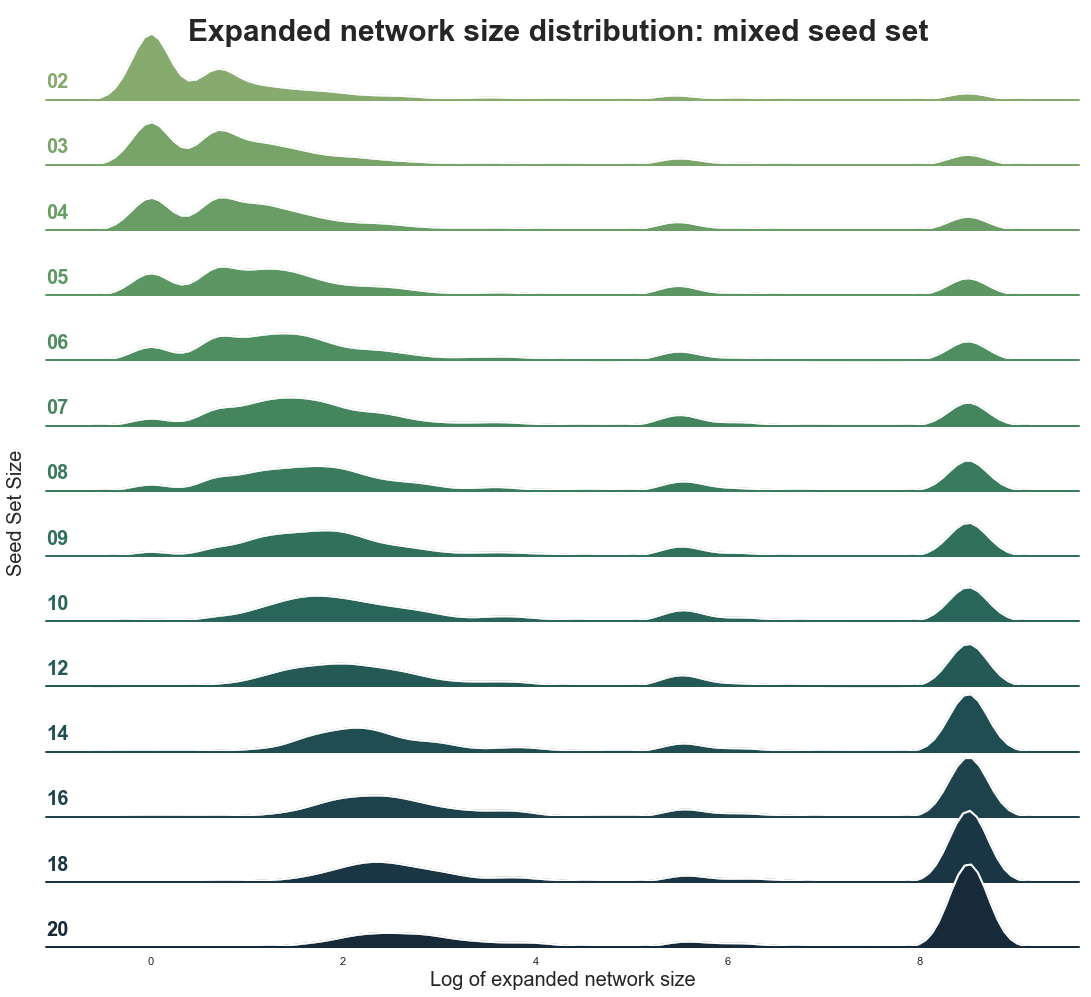

In [99]:
#density plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#list of levels (named g to correspond with example)
#g = ["achiral_2", "achiral_3", "achiral_4", "achiral_5", "achiral_6", "achiral_7", "achiral_8", "achiral_9", "achiral_10"]

#color palette (first number is the number of rows in the plot)
pal = sns.cubehelix_palette(14, rot=-.7, light=.6)
grid = sns.FacetGrid(df, row="c", hue="c", aspect=15, height=1, palette=pal)

#0-8 --> achiral 2-10
#9-17 --> chiral 2-10
#18-26 --> mix 2-10
grid.map(sns.kdeplot, "n", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
grid.map(sns.kdeplot, "n", clip_on=False, color="w", lw=2, bw=.2)
grid.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, size=20, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


grid.map(label, "n")

# Set the subplots to overlap
grid.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
grid.set_titles("")
grid.set(yticks=[])
grid.despine(bottom=True, left=True)

plt.title("Expanded network size distribution: mixed seed set ", pad=820, fontweight="bold", size=30)
plt.ylabel("Seed Set Size", labelpad=20, position=(0,5), size=20)
plt.xlabel("Log of expanded network size", size=20)
# ax.set_title("Mix_10")
# ax.set_xlabel("Number of compounds - expanded network")
# ax.set_ylabel("Density Dist")


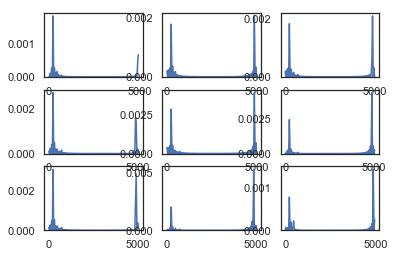

In [70]:
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.kdeplot(data[i], shade=True, bw=1)